In [1]:
from standard_map import *

In [2]:
# Parameters
n_steps = 1000
n_grid = 20
x0s = np.linspace(0, 1, n_grid)
p0s = np.linspace(-0.5, 0.5, n_grid)
p_interval = (-0.5, 0.5)

In [3]:
k_size = 4
ks = np.linspace(0.01, 5, k_size)
ks = np.array([0.001, 0.971635406, 1, 2])
k_size = ks.size

In [4]:
# Calculation of phase space
results = iterate_k(ks, x0s, p0s, n_steps)

In [5]:
# Calculation of unstable mannifold at (0.0)
epsilon = 1e-9
delta_x = np.linspace(-epsilon / 2, epsilon / 2, 2)
delta_y = delta_x

steps_mannifold = 1000
mannifold_unstable = iterate_k(ks, delta_x, delta_y, steps_mannifold)

mannifold_stable = iterate_k(ks, delta_x, delta_y, steps_mannifold, backwards=True)

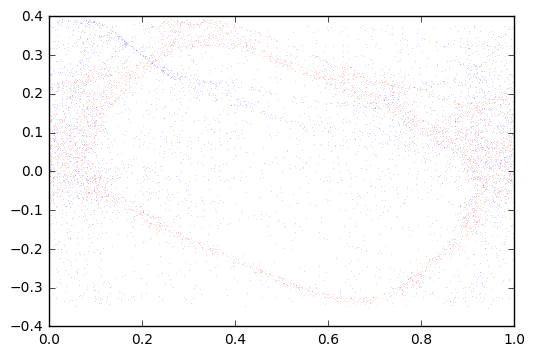

In [7]:
markersize = 0.1

idx=2
plt.plot(mannifold_unstable[idx, :, :, 0], mannifold_unstable[idx, :, :, 1], '.r',markersize=markersize)
    # plot stable mannifold
plt.plot(mannifold_stable[idx, :, :, 0], mannifold_unstable[idx, :, :, 1], '.b', markersize=markersize)
plt.show()

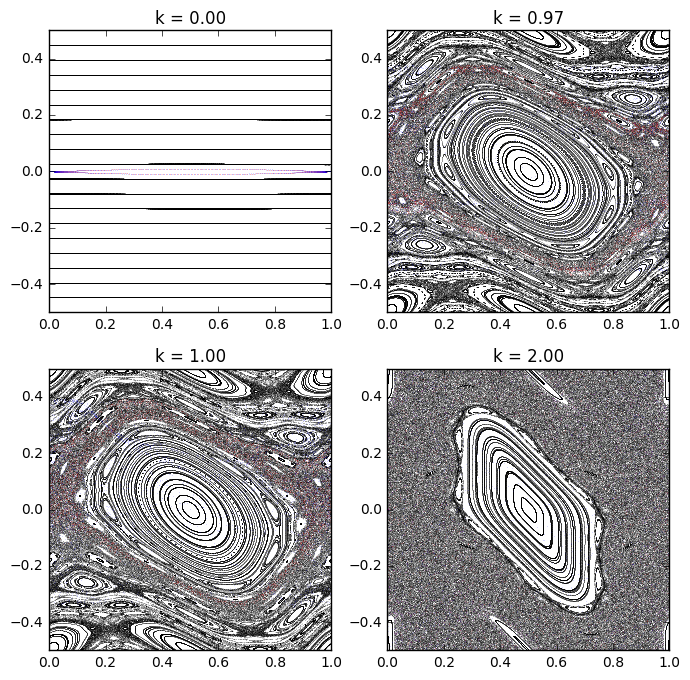

In [8]:
# Plot
# subplot matrix to show multiple results for different k
n_rows, n_cols = get_subplots_squared(k_size)

# initialize subplots
fig1, ax_array = plt.subplots(n_rows, n_cols, figsize=(8, 8))

# catch N=1 because then ax_array is not a list but a single ax object
if isinstance(ax_array, np.ndarray):
    ax_array_flat = ax_array.reshape(-1)
else:
    ax_array_flat = [ax_array]


for k_idx, k in enumerate(ks):
    current_axis = ax_array_flat[k_idx]

    # plot phase space
    current_axis.plot(results[k_idx, :, :, 0], results[k_idx, :, :, 1], '.k', markersize=markersize)
    # plot unstable mannifold
    current_axis.plot(mannifold_unstable[k_idx, :, :, 0], mannifold_unstable[k_idx, :, :, 1], '.r',
                      markersize=markersize)
    # plot stable mannifold
    current_axis.plot(mannifold_stable[k_idx, :, :, 0], mannifold_unstable[k_idx, :, :, 1], '.b',
                      markersize=markersize)
    current_axis.set_xlim(0, 1)
    current_axis.set_ylim(p_interval)
    current_axis.set_title("k = {:.2f}".format(k))
plt.show()